In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor

In [2]:
df = pd.read_csv("temperature.csv")

# EDA

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

We have 7752 rows and 25 columns

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

We have Date column with object datatype, We will transform this before building model

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Null values are present in the dataset

In [7]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


No duplicated rows are present in the dataset 

In [8]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


# dropping the null values from the dataset

In [9]:
df.dropna(axis = 0, how ='any',inplace=True)

# confirming the removal of null values

In [10]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [11]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

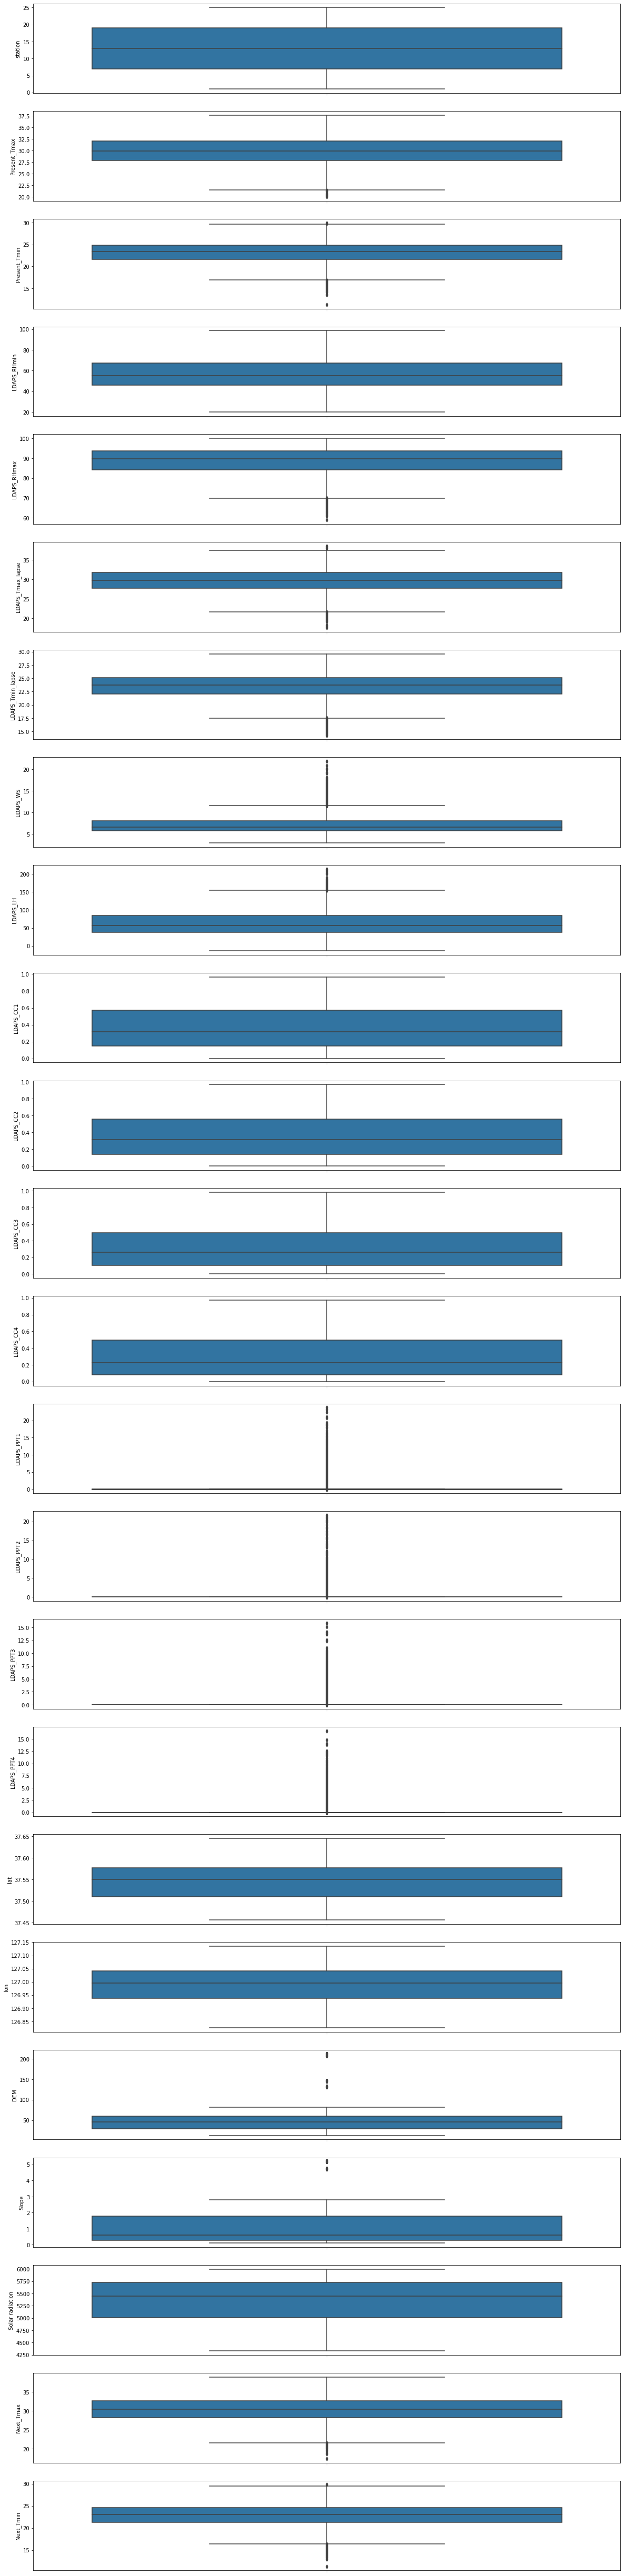

In [12]:

counter=1
plt.figure(figsize=(20,150))
columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

Outliers are present in Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_PPT1. LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, SLOPE, Next_Tmax, Next_Tmin

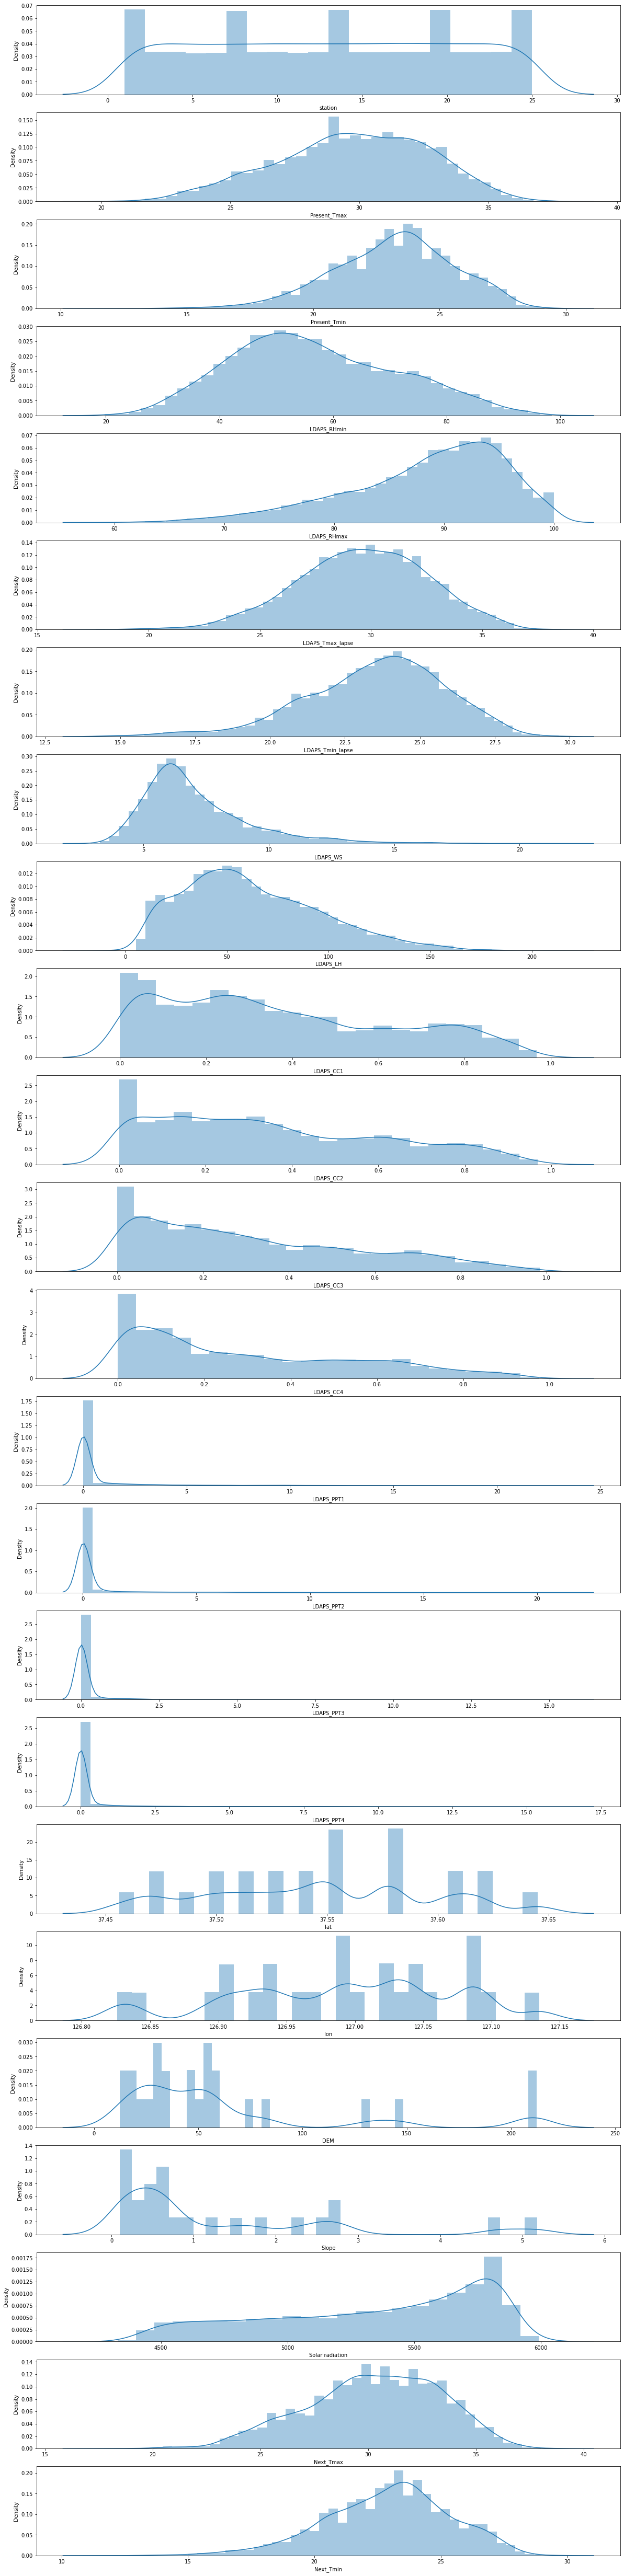

In [13]:

counter=1
plt.figure(figsize=(20,150))
columns =  ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.distplot(df[columns[i]])

We can observe LDAPS_CC1, LDAPS_CC2, lat, lon, DEM, Slope are not normally distributed 

In [14]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

Dataset is skewed

<AxesSubplot:>

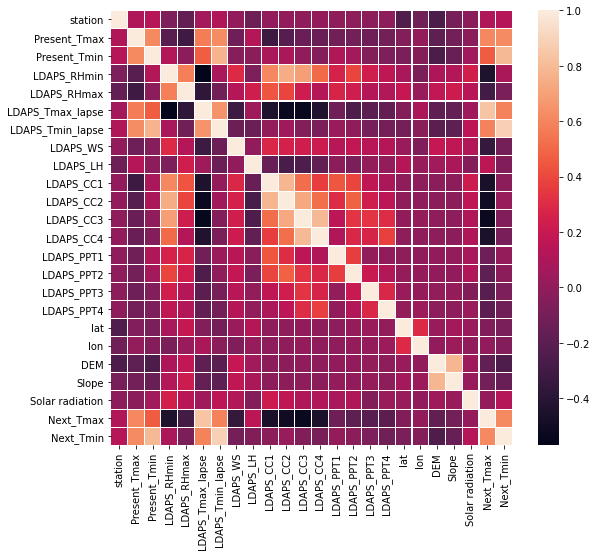

In [15]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

Their is correlation between Present_Tmin and Present_Tmax, LDAPS_Tmin_lapse and Present_Tmin, LDAPS_Tmin_lapse and Next_Tmin, LDAPS_Tmax_lapse and Next_Tmax, Present_Tmin and Next_Tmin, DEM and Slope

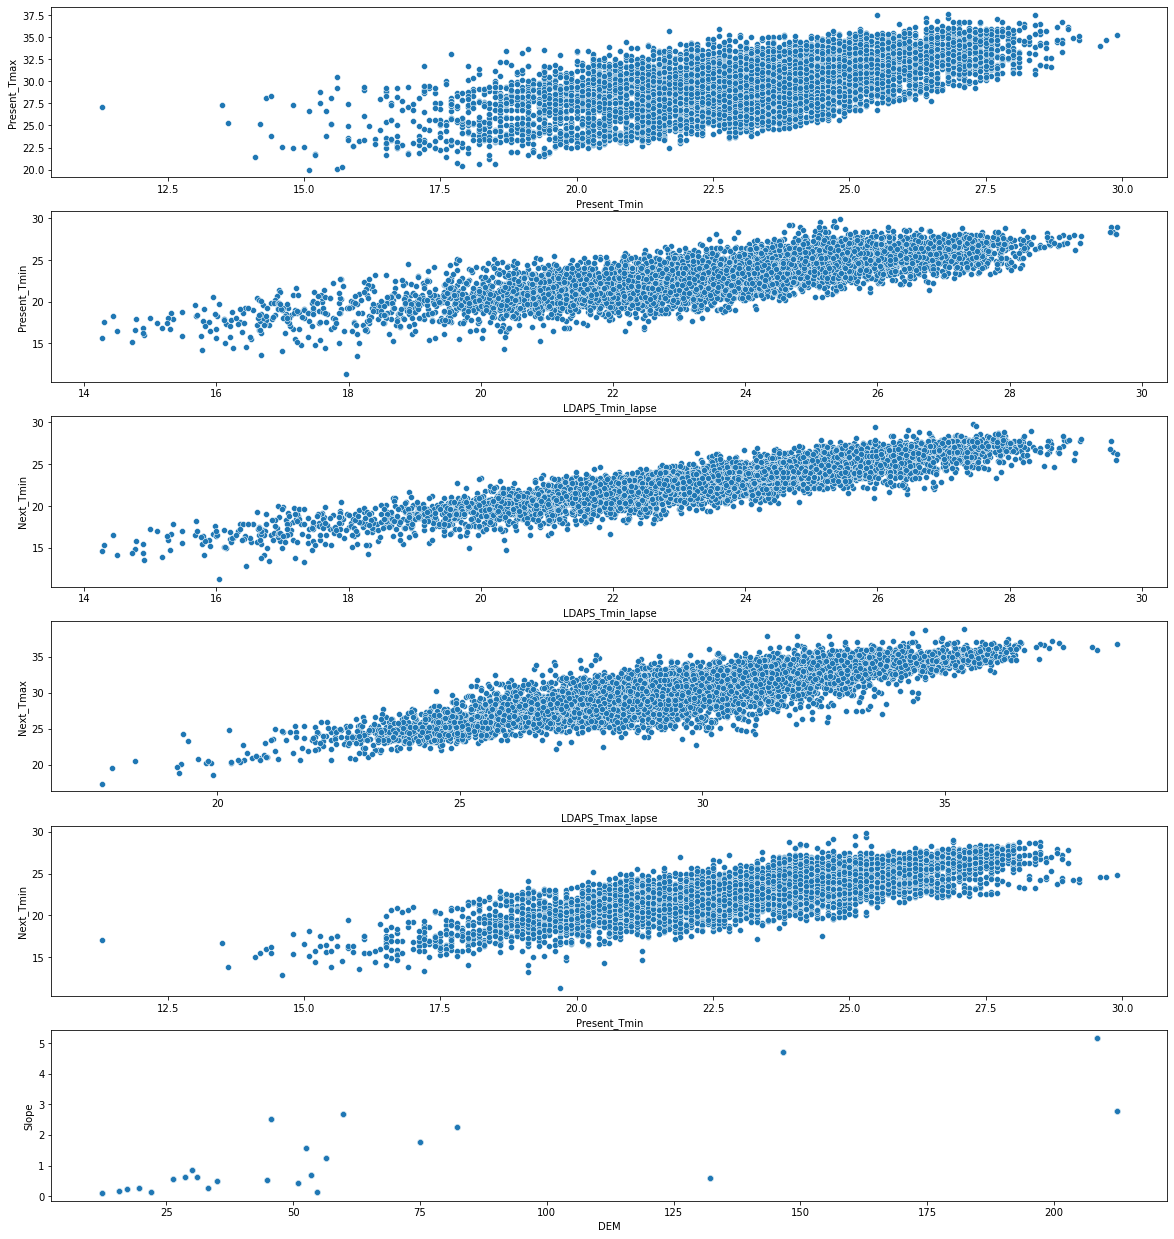

In [16]:
col1=['Present_Tmin','LDAPS_Tmin_lapse','LDAPS_Tmin_lapse','LDAPS_Tmax_lapse','Present_Tmin','DEM']
col2=['Present_Tmax','Present_Tmin','Next_Tmin','Next_Tmax','Next_Tmin','Slope']
counter=1;
plt.figure(figsize=(20,150))
for i in range(0,len(col1)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.scatterplot(x=col1[i],y=col2[i],data=df)

We can observe linear relationship between LDAPS_Tmin_lapse and Present_Tmin, LDAPS_Tmin_lapse and Next_Tmin, LDAPS_Tmax_lapse and Next_Tmax, Present_Tmin and Next_Tmin

# Removing outliers

In [17]:
columns =  ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
for i in columns:
    IQR = df[i].quantile(0.75)-df[i].quantile(0.25)
    Barmax =  df[i].quantile(0.75) + 1.5*IQR
    Barmin =  df[i].quantile(0.25) - 1.5*IQR
    df.loc[df[i]>Barmax,i] = Barmax
    df.loc[df[i]<Barmin,i] = Barmin

# Confirming removal of outliers

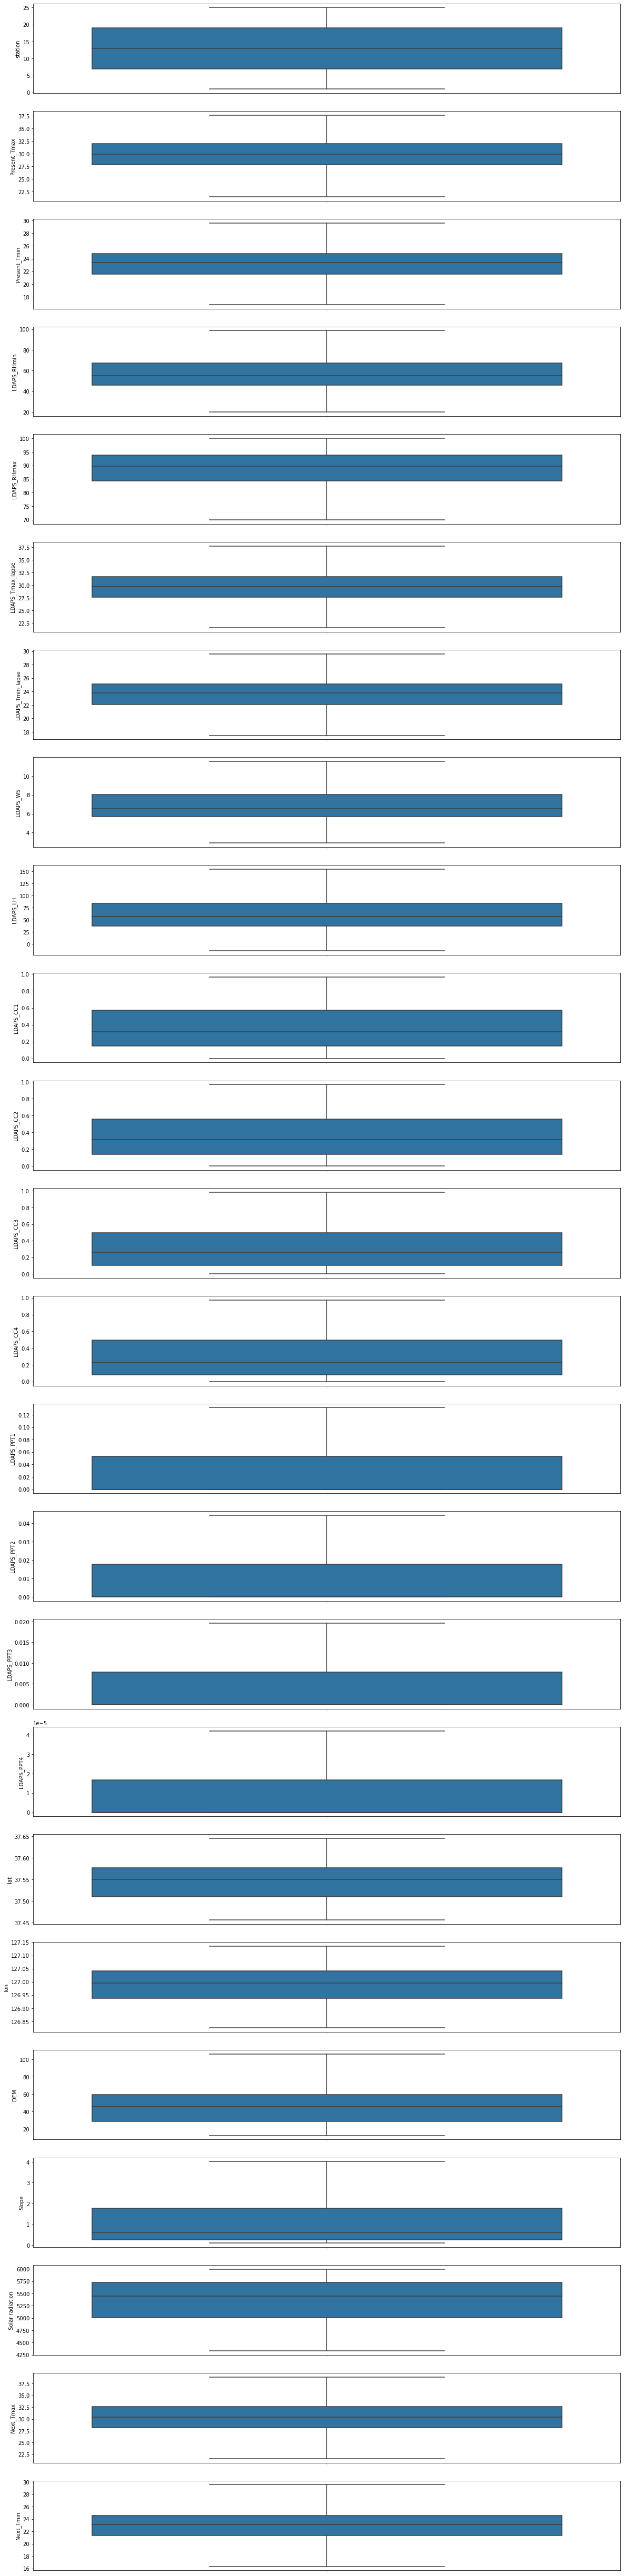

In [18]:

counter=1
plt.figure(figsize=(20,150))
columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

# converting date type variable

In [19]:
df['Date']=pd.to_datetime(df['Date'],format="%d-%m-%Y")
date_df = pd.DataFrame({"year": df['Date'].dt.year,"month": df['Date'].dt.month,"day": df['Date'].dt.day})

In [20]:
df.drop('Date',axis=1,inplace=True)

In [21]:
df=df.join(date_df)

In [22]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'year', 'month', 'day'],
      dtype='object')

# Scaling the dataset

In [23]:
fin_df = df.drop(['Next_Tmax', 'Next_Tmin'],axis=1)
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

# Removing the skewness

In [24]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

# confirming the removal of skewness

In [25]:
fin_df_new.skew()

station            -0.063081
Present_Tmax       -0.042335
Present_Tmin       -0.025783
LDAPS_RHmin         0.002733
LDAPS_RHmax        -0.145988
LDAPS_Tmax_lapse   -0.020594
LDAPS_Tmin_lapse   -0.036660
LDAPS_WS            0.036838
LDAPS_LH            0.035733
LDAPS_CC1           0.046798
LDAPS_CC2           0.046240
LDAPS_CC3           0.090429
LDAPS_CC4           0.128740
LDAPS_PPT1          0.950063
LDAPS_PPT2          0.985168
LDAPS_PPT3          0.998256
LDAPS_PPT4          1.154228
lat                -0.033879
lon                -0.076327
DEM                 0.090787
Slope               0.331711
Solar radiation    -0.213080
year               -0.070904
month              -0.105421
day                -0.064239
dtype: float64

# Train- test - split

In [26]:
x = fin_df_new
y = df[['Next_Tmax','Next_Tmin']]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    regr = LinearRegression()
    regr = MultiOutputRegressor(regr)
    regr.fit(x_train, y_train)
    pred=regr.predict(x_test)
    acc = r2_score(y_test, pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)

Best R2 Score is 0.8196591724914966 on Random State 43


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=43)

# Model Building

---------Linear Regression---------

In [30]:
from sklearn import metrics
regr = LinearRegression()
regr = MultiOutputRegressor(regr)
regr.fit(x_train, y_train)
pred=regr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.8196591724914966
MAE: 0.9220903247908876
MSE: 1.4832132726328195
RMSE: 1.2178724369295906


---------Ridge---------

In [31]:
rr = Ridge(alpha=0.01)
rr = MultiOutputRegressor(rr)
rr.fit(x_train, y_train) 
pred=rr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.8196593889969572
MAE: 0.9220897582565346
MSE: 1.4832109753905027
RMSE: 1.2178714937917312


---------Model lassso---------

In [32]:
model_lasso = Lasso(alpha=0.01)
model_lasso = MultiOutputRegressor(model_lasso)
model_lasso.fit(x_train, y_train) 
pred=model_lasso.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.8178222613889214
MAE: 0.9293661711862006
MSE: 1.5007863985604102
RMSE: 1.2250658751921915


---------elastic net---------

In [33]:
model_enet = ElasticNet(alpha = 0.01)
model_enet = MultiOutputRegressor(model_enet)
model_enet.fit(x_train, y_train) 
pred=model_enet.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.81859054413712
MAE: 0.9264923766070066
MSE: 1.4935939537836265
RMSE: 1.2221268157534333


--------- decision tree---------

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtr=DecisionTreeRegressor()
dtr = MultiOutputRegressor(dtr)
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('R2 score', r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.7954586171904869
MAE: 0.9120772946859904
MSE: 1.6128480456741328
RMSE: 1.269979545376276


--------- random forest---------

In [35]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr = MultiOutputRegressor(rdr)
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.90913860730286
MAE: 0.6367497804128237
MSE: 0.7219476107268333
RMSE: 0.8496750030022263


# cross validation score

In [36]:
print("Cross validation score:",cross_val_score(regr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -1.061740155210087


Linear regression : -1.06

In [37]:
print("Cross validation score:",cross_val_score(rr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -1.0617335985634384


Ridge : -1.06

In [38]:
print("Cross validation score:",cross_val_score(model_lasso,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -1.0454285340448528


lasso : -1.04

In [39]:
print("Cross validation score:",cross_val_score(model_enet,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -1.0488096373924263


elastic net : -1.04

In [40]:
print("Cross validation score:",cross_val_score(dtr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -1.428131219043202


Decision tree : -1.42

In [41]:
print("Cross validation score:",cross_val_score(rdr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -1.0352265635707043


Random forest : -1.03

We can observe that Random forest is having lowest neg_mean_absloute_error for cross validation, Hence we will use Random Forest model for hypertuning

# Hypertuning

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameter = {
 'max_depth': [100, 400, 800],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400, 800]
}
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5)


In [44]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [100, 400, 800],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400, 800]})

In [45]:
GCV.best_params_

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

# Building final model

In [47]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(max_depth= 100,
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 800)

rdr = MultiOutputRegressor(rdr)
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.9109142096689217
MAE: 0.6298967940272289
MSE: 0.7066140101644837
RMSE: 0.8406033607858606


We can observe that after hypertuning R2 score for the model has increased to 0.91

# saving the model

In [48]:
import joblib
joblib.dump(rdr,"Temperature.pkl")


['Temperature.pkl']